Project Question: By using Chronic Kidney Disease data gathered from 5 different hospitals in India create a prediction model which would be able by at least 65% accuracy predict if a person is likely to have developed a chronic kidney disease (CKD) 

Information about the data: <br>
    ○ 25 number of values (including class/label) <br>
    ○ 400 number of instances <br>
    ○ There are missing values <br>
    ○ Data was made public in 2015 <br>
    ○ Link to data source: http://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease <br>

What is chronic kidney disease?
It is one of several kidney diseases that results a gradual loss of kidney functionality which could lead in death.
According to the statistics there were around 323 millions of people in the entire world which were affected by one or another form of this disease (source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5055577/). 

Why this kind of project would be necessary and valuable?
Chronic kidney disease is a growing problem world-wide and therefore it is important to bring some more attention to it. CKD is comprised of 5 different stages and there are ways that the progression of kidney failure could be slowed down or stopped. Therefore it is very important to be able to discover people which are likely to have developed CKD as soon as possible.  

This project could be able to contribute to early discovering of patients who have developed CKD by looking in a number (24 in total) of factors which are said to be helpful while trying to indicate if a person has actually developed CKD.

Project delimitations: <br>
    ○ Data collected only from 1 country <br>
    ○ Relatively small (400) amount of instances <br>

## Imports

In [2]:
import pandas as pd
import numpy as np
# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


## Reading data

In [3]:
# Reading data table and assigning names for columns
readData = pd.read_table('chronic_kidney_disease_cleaned.arff', ',', header=None,
                         names=["age", "bloodPressure","specificGravity","albumin","sugar","redBloodCells","pusCell","pusCellClumps",
                                "bacteria", "bloodGlucoseRandom","bloodUrea","serumCreatinine","sodium",
                                "potassium","hemoglobin","packedCellVolume","whiteBloodCellCount",
                                "redBloodCellCount","hypertension","diabetesMellitus","coronaryArteryDisease",
                                "appetite","pedalEdema","anemia","class" ])
data = pd.DataFrame(readData);
# Number of collumns and rows
print("Rows and Columns", data.shape)

#Showing 10 first rows
#data.head(10)

Rows and Columns (400, 25)


## Data processing

### Cheking for missing data

In [4]:
# Replacing missing ("?") and ("\t?") data with NaN values
data = data.replace('?', np.NaN)
data = data.replace('\t?', np.NaN)

# Visualizing changed values
data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,NaN,normal,notpresent,notpresent,100,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
#Checking where is missing data by each column
# As it could be seen there is a lot of missing data in the table
missing = data.isnull().sum(axis=0) 
print("Columns and Number of missing data \n", missing)

Columns and Number of missing data 
 age                        9
bloodPressure             12
specificGravity           47
albumin                   46
sugar                     49
redBloodCells            152
pusCell                   65
pusCellClumps              4
bacteria                   4
bloodGlucoseRandom        44
bloodUrea                 19
serumCreatinine           17
sodium                    87
potassium                 88
hemoglobin                52
packedCellVolume          71
whiteBloodCellCount      106
redBloodCellCount        131
hypertension               2
diabetesMellitus           3
coronaryArteryDisease      2
appetite                   1
pedalEdema                 1
anemia                     1
class                      0
dtype: int64


## Replacing nominal (text) values into numerical values

Replacing nominal (text) values with numerical values is important since otherwise we will not be able to work with most of the algorithms

In [6]:
# Making a map where 'normal' will be converted into 1 and 'abnormal' will be converted into 0
redBloodCells_mapping = {'normal' : 1, 'abnormal' : 0}
# Making the actual convertion and replacing the values in the table
data['redBloodCells'] = data['redBloodCells'].map(redBloodCells_mapping)

# Making a map where 'normal' will be converted into 1 and 'abnormal' will be converted into 0
pusCell_mapping = {'normal' : 1, 'abnormal' : 0}
# Making the actual convertion and replacing the values in the table
data['pusCell'] = data['pusCell'].map(pusCell_mapping)

# Making a map where 'present' will be converted into 1 and 'notpresent' will be converted into 0
pusCellClumps_mapping = {'present' : 1, 'notpresent' : 0}
# Making the actual convertion and replacing the values in the table
data['pusCellClumps'] = data['pusCellClumps'].map(pusCellClumps_mapping)

# Making a map where 'present' will be converted into 1 and 'notpresent' will be converted into 0
bacteria_mapping = {'present' : 1, 'notpresent' : 0}
# Making the actual convertion and replacing the values in the table
data['bacteria'] = data['bacteria'].map(bacteria_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
hypertension_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['hypertension'] = data['hypertension'].map(hypertension_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
diabetesMellitus_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['diabetesMellitus'] = data['diabetesMellitus'].map(diabetesMellitus_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
coronaryArteryDisease_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['coronaryArteryDisease'] = data['coronaryArteryDisease'].map(coronaryArteryDisease_mapping)

# Making a map where 'good' will be converted into 1 and 'poor' will be converted into 0
appetite_mapping = {'good' : 1, 'poor' : 0}
# Making the actual convertion and replacing the values in the table
data['appetite'] = data['appetite'].map(appetite_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
pedalEdema_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['pedalEdema'] = data['pedalEdema'].map(pedalEdema_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
anemia_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['anemia'] = data['anemia'].map(anemia_mapping)


# Here we are working with mapping of the class label
# Making a map where 'ckd' will be converted into 1 and 'notckd' will be converted into 0
class_mapping = {'ckd' : 1, 'notckd' : 0}
# Making the actual convertion and replacing the values in the table
data['class'] = data['class'].map(class_mapping)

## Replacing missing data

Our strategy with missing data:
When there are some missing data in the table there could be couple of approaches how this problem could be solved. The easiest way could be to just remove those collumns that have an extensive amount of missing data. Even though we have a relatively high amount of data that is missing there are no collumns where the amount of missing data is higher then 90%. Therefore, we have chosen to find ways how to replace this data instead of removing it.

In [7]:
# Replace empty 'age' values by their columns average
data['age'] = data.age.astype(float)
data['age'].fillna((data['age'].mean()), inplace=True)
data['age'] = data.age.astype(int)

# Replace empty 'bloodPressure' values by their columns average
data['bloodPressure'] = data.bloodPressure.astype(float)
data['bloodPressure'].fillna((data['bloodPressure'].mean()), inplace=True)
data['bloodPressure'] = data.bloodPressure.astype(int)

#Replace empty 'specificGravity' values with most frequent value in the collumn
data['specificGravity'] = data['specificGravity'].fillna(data['specificGravity'].value_counts().index[0])
data['specificGravity'] = data.specificGravity.astype(float)

#Replace empty 'albumin' values with most frequent value in the collumn
data['albumin'] = data['albumin'].fillna(data['albumin'].value_counts().index[0])
data['albumin'] = data.albumin.astype(int)

#Replace empty 'sugar' values with most frequent value in the collumn
data['sugar'] = data['sugar'].fillna(data['sugar'].value_counts().index[0])
data['sugar'] = data.sugar.astype(int)

#Replace empty 'redBloodCells' values with most frequent value in the collumn
data['redBloodCells'] = data['redBloodCells'].fillna(data['redBloodCells'].value_counts().index[0])
data['redBloodCells'] = data.redBloodCells.astype(int)

#Replace empty 'pusCell' values with most frequent value in the collumn
data['pusCell'] = data['pusCell'].fillna(data['pusCell'].value_counts().index[0])
data['pusCell'] = data.pusCell.astype(int)

#Replace empty 'pusCellClumps' values with most frequent value in the collumn
data['pusCellClumps'] = data['pusCellClumps'].fillna(data['pusCellClumps'].value_counts().index[0])
data['pusCellClumps'] = data.pusCellClumps.astype(int)

#Replace empty 'bacteria' values with most frequent value in the collumn
data['bacteria'] = data['bacteria'].fillna(data['bacteria'].value_counts().index[0])
data['bacteria'] = data.bacteria.astype(int)

#Replace empty 'bloodGlucoseRandom' values with most frequent value in the collumn
data['bloodGlucoseRandom'] = data['bloodGlucoseRandom'].fillna(data['bloodGlucoseRandom'].value_counts().index[0])
data['bloodGlucoseRandom'] = data.bloodGlucoseRandom.astype(int)

# Replace empty 'bloodUrea' values by their columns average
data['bloodUrea'] = data.bloodUrea.astype(float)
data['bloodUrea'].fillna((data['bloodUrea'].mean()), inplace=True)
data['bloodUrea'] = data.bloodUrea.astype(int)

# Replace empty 'serumCreatinine' values by their columns average
data['serumCreatinine'] = data.serumCreatinine.astype(float)
data['serumCreatinine'].fillna((data['serumCreatinine'].mean()), inplace=True)
data['serumCreatinine'] = data.serumCreatinine.astype(int)

# Replace empty 'sodium' values by their columns average
data['sodium'] = data.sodium.astype(float)
data['sodium'].fillna((data['sodium'].mean()), inplace=True)
data['sodium'] = data.sodium.astype(int)

# Replace empty 'potassium' values by their columns average
data['potassium'] = data.potassium.astype(float)
data['potassium'].fillna((data['potassium'].mean()), inplace=True)
data['potassium'] = data.potassium.astype(int)

# Replace empty 'hemoglobin' values by their columns average
data['hemoglobin'] = data.hemoglobin.astype(float)
data['hemoglobin'].fillna((data['hemoglobin'].mean()), inplace=True)
data['hemoglobin'] = data.hemoglobin.astype(int)

# Replace empty 'packedCellVolume' values by their columns average
data['packedCellVolume'] = data.packedCellVolume.astype(float)
data['packedCellVolume'].fillna((data['packedCellVolume'].mean()), inplace=True)
data['packedCellVolume'] = data.packedCellVolume.astype(int)

# Replace empty 'whiteBloodCellCount' values by their columns average
data['whiteBloodCellCount'] = data.whiteBloodCellCount.astype(float)
data['whiteBloodCellCount'].fillna((data['whiteBloodCellCount'].mean()), inplace=True)
data['whiteBloodCellCount'] = data.whiteBloodCellCount.astype(int)

# Replace empty 'redBloodCellCount' values by their columns average
data['redBloodCellCount'] = data.redBloodCellCount.astype(float)
data['redBloodCellCount'].fillna((data['redBloodCellCount'].mean()), inplace=True)
data['redBloodCellCount'] = data.redBloodCellCount.astype(int)

#Replace empty 'hypertension' values with most frequent value in the collumn
data['hypertension'] = data['hypertension'].fillna(data['hypertension'].value_counts().index[0])
data['hypertension'] = data.hypertension.astype(int)

#Replace empty 'diabetesMellitus' values with most frequent value in the collumn
data['diabetesMellitus'] = data['diabetesMellitus'].fillna(data['diabetesMellitus'].value_counts().index[0])
data['diabetesMellitus'] = data.diabetesMellitus.astype(int)

#Replace empty 'coronaryArteryDisease' values with most frequent value in the collumn
data['coronaryArteryDisease'] = data['coronaryArteryDisease'].fillna(data['coronaryArteryDisease'].value_counts().index[0])
data['coronaryArteryDisease'] = data.coronaryArteryDisease.astype(int)

#Replace empty 'appetite' values with most frequent value in the collumn
data['appetite'] = data['appetite'].fillna(data['appetite'].value_counts().index[0])
data['appetite'] = data.appetite.astype(int)

#Replace empty 'pedalEdema' values with most frequent value in the collumn
data['pedalEdema'] = data['pedalEdema'].fillna(data['pedalEdema'].value_counts().index[0])
data['pedalEdema'] = data.pedalEdema.astype(int)

#Replace empty 'anemia' values with most frequent value in the collumn
data['anemia'] = data['anemia'].fillna(data['anemia'].value_counts().index[0])
data['anemia'] = data.anemia.astype(int)

data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5,1,1,0,1,0,0,1.0
1,7,50,1.020,4,0,1,1,0,0,99,...,38,6000,4,0,0,0,1,0,0,1.0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4,0,1,0,0,0,1,1.0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3,1,0,0,0,1,1,1.0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4,0,0,0,1,0,0,1.0
5,60,90,1.015,3,0,1,1,0,0,74,...,39,7800,4,1,1,0,1,1,0,1.0
6,68,70,1.010,0,0,1,1,0,0,100,...,36,8406,4,0,0,0,1,0,0,1.0
7,24,76,1.015,2,4,1,0,0,0,410,...,44,6900,5,0,1,0,1,1,0,1.0
8,52,100,1.015,3,0,1,0,1,0,138,...,33,9600,4,1,1,0,1,0,1,1.0
9,53,90,1.020,2,0,0,0,1,0,70,...,29,12100,3,1,1,0,0,0,1,1.0


## Distribution of attributes

In this section we will visualize distribution of various attributes that are part of our data table. In this way we will be able to better understand with what kind of data we are working with and already see where could we find some possible candidates for outliers.

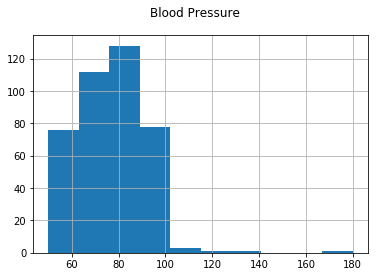

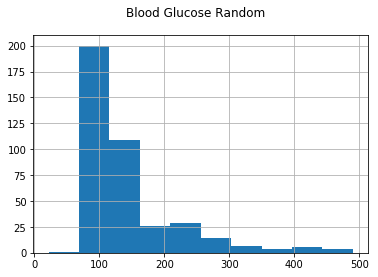

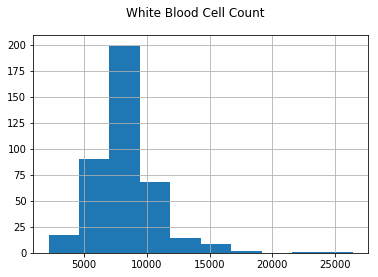

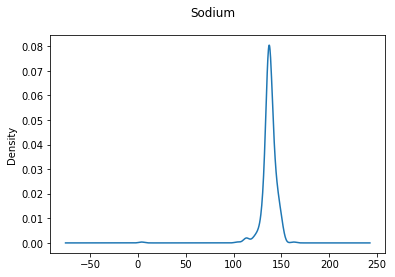

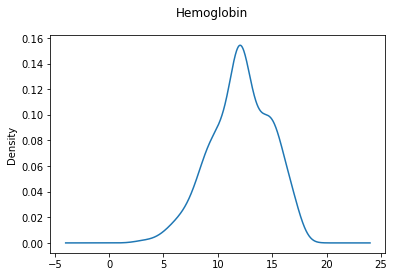

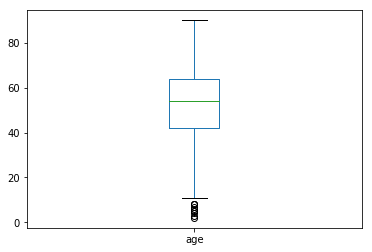

In [8]:

data["bloodPressure"].hist(grid=True)
plt.suptitle("Blood Pressure")
plt.show()

data["bloodGlucoseRandom"].hist(grid=True)
plt.suptitle("Blood Glucose Random")
plt.show()

data["whiteBloodCellCount"].hist(grid=True)
plt.suptitle("White Blood Cell Count")
plt.show()

data["sodium"].plot(kind='density', subplots=True, sharex=False)
plt.suptitle("Sodium")
plt.show()

data["hemoglobin"].plot(kind='density', subplots=True, sharex=False)
plt.suptitle("Hemoglobin")
plt.show()

data["age"].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

## Outliers

In this section we are checking for outliers which are the data values that are far away from the average value inside a column. The outliers are found with a help of the average of the column values and also using standart deviation. <br>
While working with this part of the project we had to look into what kind of values or their differences are considered to be "normal". Therefore variation of inputs in some of the lines is different, since after closer inspection we have found out that such attributes like "Blood Glucose Random" may vary a lot in the real life therefore this kind of variation not necessarily mean errors in collecting the data <br>
We would also like to mention that the "Age" attribute is not being checked for possible outliers, because those values that are very different from the average value of this column are also most likely not a mistake. It is very possible, that the researchers who were working on collecting this data wanted to have a broader view of the situation therefore they have gathered data also from those patients who were much younger then the average. 

In [9]:

# Cheking for outliers in the "bloodPressure" column
data["bloodPressure"] = data["bloodPressure"][abs(data["bloodPressure"] - np.mean(data["bloodPressure"])) < 3 * np.std(data["bloodPressure"])]

# Cheking for outliers in the "bloodGlucoseRandom" column
data["bloodGlucoseRandom"] = data["bloodGlucoseRandom"][abs(data["bloodGlucoseRandom"] - np.mean(data["bloodGlucoseRandom"])) < 4 * np.std(data["bloodGlucoseRandom"])]

# Cheking for outliers in the "bloodUrea" column
data["bloodUrea"] = data["bloodUrea"][abs(data["bloodUrea"] - np.mean(data["bloodUrea"])) < 3 * np.std(data["bloodUrea"])]

# Cheking for outliers in the "serumCreatinine" column
data["serumCreatinine"] = data["serumCreatinine"][abs(data["serumCreatinine"] - np.mean(data["serumCreatinine"])) < 3 * np.std(data["serumCreatinine"])]

# Cheking for outliers in the "sodium" column
data["sodium"] = data["sodium"][abs(data["sodium"] - np.mean(data["sodium"])) < 4 * np.std(data["sodium"])]

# Cheking for outliers in the "potassium" column
data["potassium"] = data["potassium"][abs(data["potassium"] - np.mean(data["potassium"])) < 3 * np.std(data["potassium"])]

# Cheking for outliers in the "hemoglobin" column
data["hemoglobin"] = data["hemoglobin"][abs(data["hemoglobin"] - np.mean(data["hemoglobin"])) < 3 * np.std(data["hemoglobin"])]

# Cheking for outliers in the "packedCellVolume" column
data["packedCellVolume"] = data["packedCellVolume"][abs(data["packedCellVolume"] - np.mean(data["packedCellVolume"])) < 3 * np.std(data["packedCellVolume"])]

# Cheking for outliers in the "whiteBloodCellCount" column
data["whiteBloodCellCount"] = data["whiteBloodCellCount"][abs(data["whiteBloodCellCount"] - np.mean(data["whiteBloodCellCount"])) < 3 * np.std(data["whiteBloodCellCount"])]

# Cheking for outliers in the "redBloodCellCount" column
data["redBloodCellCount"] = data["redBloodCellCount"][abs(data["redBloodCellCount"] - np.mean(data["redBloodCellCount"])) < 3 * np.std(data["redBloodCellCount"])]

#print(data["redBloodCellCount"])

missing = data.isnull().sum(axis=0) 
print("Columns and Number of missing data \n", missing)

#print(data["class"])

data.head(10)


Columns and Number of missing data 
 age                       0
bloodPressure             3
specificGravity           0
albumin                   0
sugar                     0
redBloodCells             0
pusCell                   0
pusCellClumps             0
bacteria                  0
bloodGlucoseRandom        3
bloodUrea                10
serumCreatinine           4
sodium                    1
potassium                 2
hemoglobin                1
packedCellVolume          2
whiteBloodCellCount       6
redBloodCellCount         1
hypertension              0
diabetesMellitus          0
coronaryArteryDisease     0
appetite                  0
pedalEdema                0
anemia                    0
class                     3
dtype: int64


,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80.0,1.020,1,0,1,1,0,0,121.0,...,44.0,7800.0,5.0,1,1,0,1,0,0,1.0
1,7,50.0,1.020,4,0,1,1,0,0,99.0,...,38.0,6000.0,4.0,0,0,0,1,0,0,1.0
2,62,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,4.0,0,1,0,0,0,1,1.0
3,48,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.0,1,0,0,0,1,1,1.0
4,51,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.0,0,0,0,1,0,0,1.0
5,60,90.0,1.015,3,0,1,1,0,0,74.0,...,39.0,7800.0,4.0,1,1,0,1,1,0,1.0
6,68,70.0,1.010,0,0,1,1,0,0,100.0,...,36.0,8406.0,4.0,0,0,0,1,0,0,1.0
7,24,76.0,1.015,2,4,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,1,1,0,1.0
8,52,100.0,1.015,3,0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,1,0,1,1.0
9,53,90.0,1.020,2,0,0,0,1,0,70.0,...,29.0,12100.0,3.0,1,1,0,0,0,1,1.0


In [10]:
# Here we are removing all the rows which have missing data which was removed when we were looking for the outliers.
data.dropna(inplace=True)
# Here we are re-setting the indexes of the table
data.reset_index(drop=True, inplace=True)

## Correlation

In this part we are going to check if there are any correlating columns and will visualize it. <br>
Correlating columns are the ones which: <br>
○ Provide the same information, but just in different formats <br>
○ Are not very useful, because they do not provide that much of an information <br>
○ Could potentially confuse algorithm that we are using

Showing the correlation matrix using matplotlib.pyplot library <br>
The yeallow color means that columns are highly correlated while the blue ones mean that they are not correlated. As we can see from the matrix there are no higly correlated columns in our data table, therefore no columns are necessary to be removed. P.S. In our case the yellow spots in the table represents the same columns

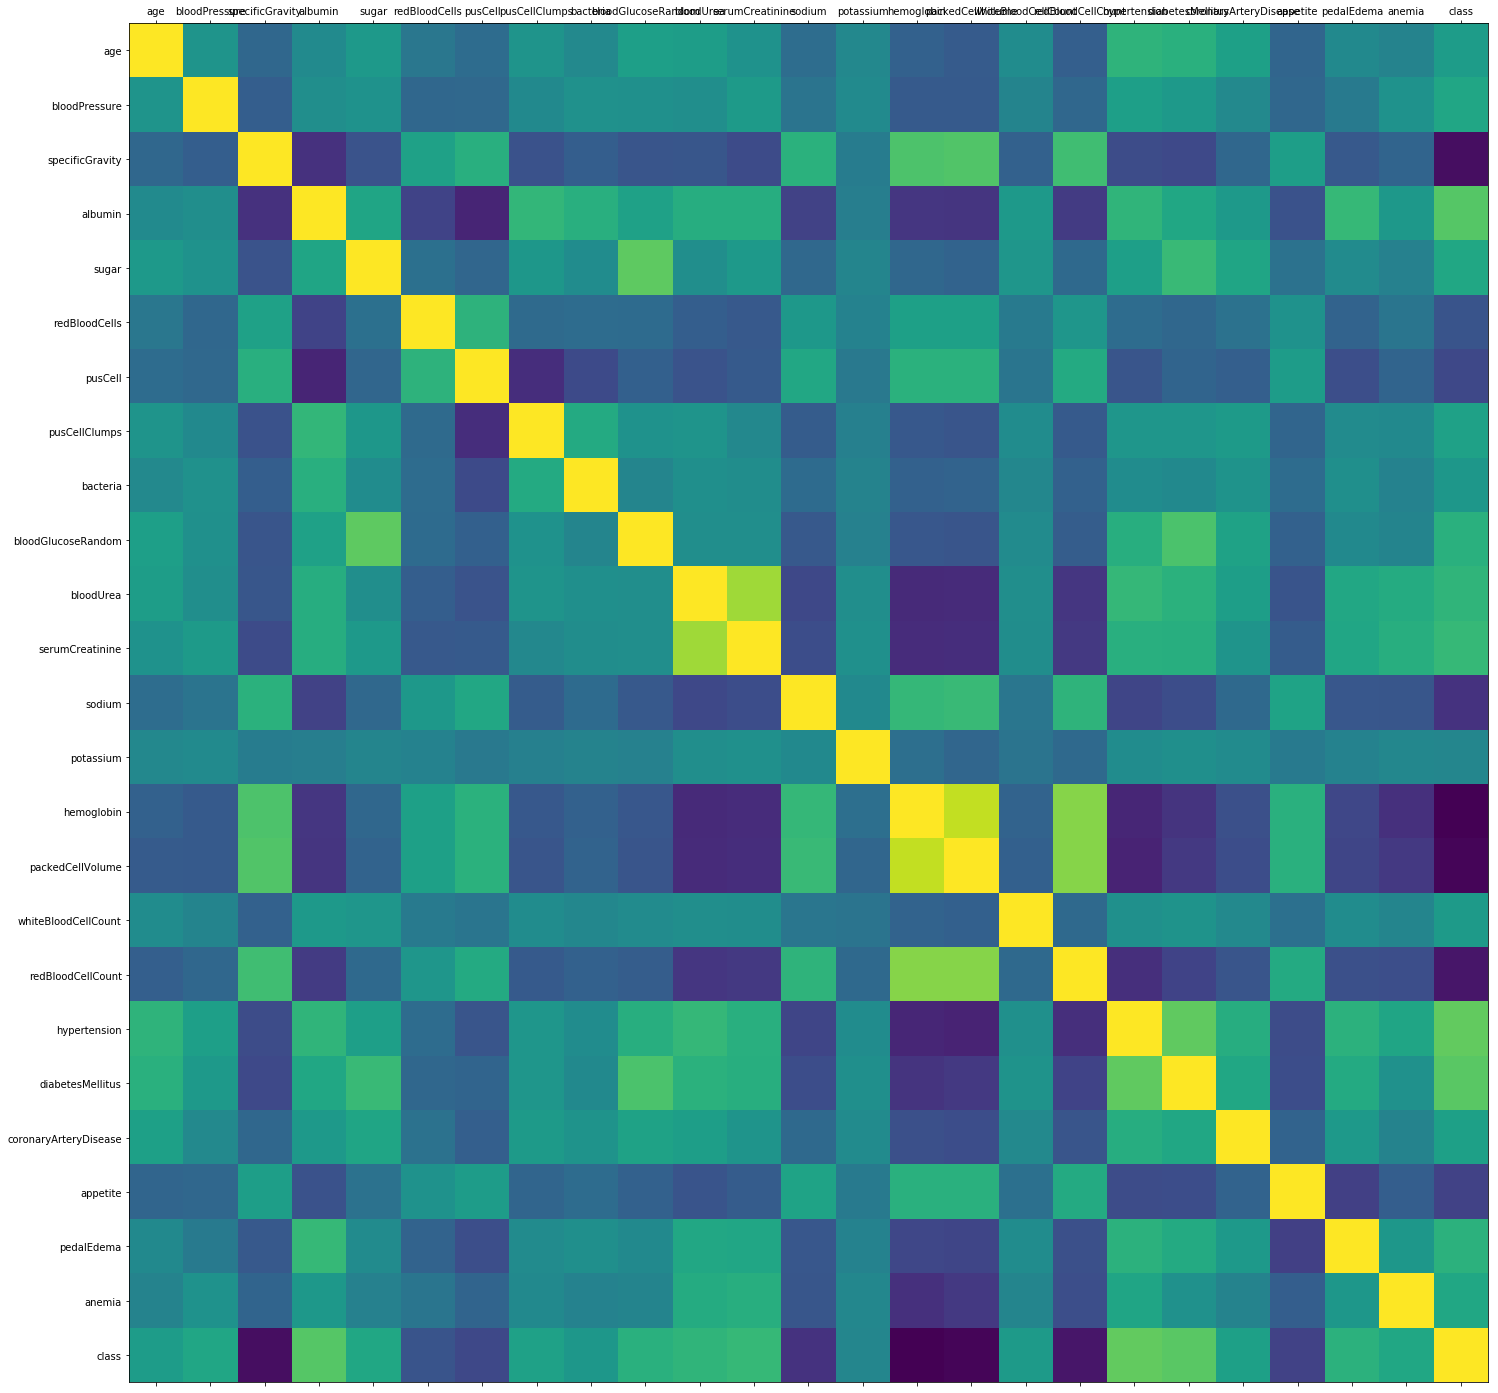

In [11]:

corr = data.corr()
fig, ax = plt.subplots(figsize=(25, 25))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


## Data pre-processing

In this part we will try to apply some common techniques 

### Scalling

In [12]:
# Scalling all the columns with the numeric values.
scaler = MinMaxScaler(feature_range=(0, 1))

data[['age','bloodPressure','bloodGlucoseRandom','bloodUrea','serumCreatinine',
      'sodium','potassium','hemoglobin','packedCellVolume','whiteBloodCellCount',
      'redBloodCellCount']] = scaler.fit_transform(data[['age','bloodPressure','bloodGlucoseRandom',
                                                         'bloodUrea','serumCreatinine','sodium','potassium',
                                                         'hemoglobin','packedCellVolume','whiteBloodCellCount',
                                                         'redBloodCellCount']])
data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,0.522727,0.500000,1.020,1,0,1,1,0,0,0.232941,...,0.736842,0.414815,0.75,1,1,0,1,0,0,1.0
1,0.056818,0.000000,1.020,4,0,1,1,0,0,0.181176,...,0.578947,0.281481,0.50,0,0,0,1,0,0,1.0
2,0.681818,0.500000,1.010,2,3,1,1,0,0,0.943529,...,0.394737,0.392593,0.50,0,1,0,0,0,1,1.0
3,0.522727,0.333333,1.005,4,0,1,0,1,0,0.223529,...,0.421053,0.333333,0.25,1,0,0,0,1,1,1.0
4,0.556818,0.500000,1.010,2,0,1,1,0,0,0.197647,...,0.500000,0.377778,0.50,0,0,0,1,0,0,1.0
5,0.659091,0.666667,1.015,3,0,1,1,0,0,0.122353,...,0.605263,0.414815,0.50,1,1,0,1,1,0,1.0
6,0.250000,0.433333,1.015,2,4,1,0,0,0,0.912941,...,0.736842,0.348148,0.75,0,1,0,1,1,0,1.0
7,0.568182,0.833333,1.015,3,0,1,0,1,0,0.272941,...,0.447368,0.548148,0.50,1,1,0,1,0,1,1.0
8,0.579545,0.666667,1.020,2,0,0,0,1,0,0.112941,...,0.342105,0.733333,0.25,1,1,0,0,0,1,1.0
9,0.693182,0.333333,1.010,3,0,0,0,1,0,0.842353,...,0.421053,0.170370,0.25,1,1,0,0,1,0,1.0


## Feature Importance

In this section we will analyze which columns have biggers influence on the label and which ones are less important therefore could be possible candidates in removing them.

We started calculating the importance of the columns with a ExtraTreesClassifier() method which weights every attribute (column). In this case, the higher the number, the more important a column is for the result. As it could be seen in the results, there are two particular columns which are absolutely not important for the result and those are "Bacteria" and "Coronary Artery Disease"  Therefore, we have chosen to remove them. There are also some columns that have a relatively low impact on the result ("Sugar", "Potassium"), however, we have decided that we will leave them for now.

Feature ranking:
1. feature 18 (0.248819)
2. feature 15 (0.109928)
3. feature 17 (0.097197)
4. feature 14 (0.093244)
5. feature 2 (0.088417)
6. feature 3 (0.083076)
7. feature 19 (0.063747)
8. feature 21 (0.034157)
9. feature 11 (0.031785)
10. feature 10 (0.021030)
11. feature 4 (0.019209)
12. feature 9 (0.016345)
13. feature 5 (0.015652)
14. feature 12 (0.013816)
15. feature 22 (0.012809)
16. feature 6 (0.011847)
17. feature 0 (0.009163)
18. feature 7 (0.008001)
19. feature 13 (0.007504)
20. feature 1 (0.005779)
21. feature 16 (0.005403)
22. feature 8 (0.001921)
23. feature 23 (0.001149)
24. feature 20 (0.000000)


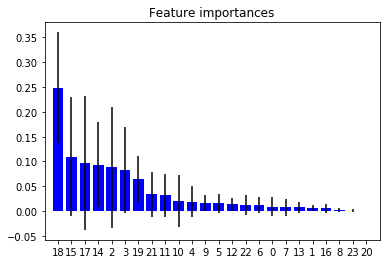

In [13]:
#print (data.dtypes)
array = data.values
X = array[:,0:24]
Y = array[:,24]

model = ExtraTreesClassifier()
model.fit(X, Y)
#print(model.feature_importances_)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



In [14]:
#array = data.values
#X = array[:,0:24]
#Y = array[:,24]

#model = ExtraTreesClassifier()
#model.fit(X, Y)
# create a base classifier used to evaluate a subset of attributes
#model = LogisticRegression()

#rfe = RFE(model, 10)
#rfe = rfe.fit(X, Y)

#print(rfe.support_)
#print(rfe.ranking_)

## Removing not important columns

In this part we are removing those columns that according to our research done are less important for the actual result. At the start we have decided to leave only 10 most valuable columns, but this might change since we will try investigate how choosing different columns is affecting accurace of the model.

In [15]:
# Removing less important columns
del data['pusCellClumps']
del data['whiteBloodCellCount']
del data['potassium']
del data['bacteria']
del data['coronaryArteryDisease']
del data['age']
del data['sugar']
del data['bloodUrea']
del data['sodium']
del data['bloodPressure']
del data['bloodGlucoseRandom']
del data['redBloodCells']
del data['serumCreatinine']
del data['anemia']


In [16]:
data.shape
data.head(10)

,specificGravity,albumin,pusCell,hemoglobin,packedCellVolume,redBloodCellCount,hypertension,diabetesMellitus,appetite,pedalEdema,class
0,1.020,1,1,0.833333,0.736842,0.75,1,1,1,0,1.0
1,1.020,4,1,0.500000,0.578947,0.50,0,0,1,0,1.0
2,1.010,2,1,0.333333,0.394737,0.50,0,1,0,0,1.0
3,1.005,4,0,0.500000,0.421053,0.25,1,0,0,1,1.0
4,1.010,2,1,0.500000,0.500000,0.50,0,0,1,0,1.0
5,1.015,3,1,0.583333,0.605263,0.50,1,1,1,1,1.0
6,1.015,2,0,0.583333,0.736842,0.75,0,1,1,1,1.0
7,1.015,3,0,0.416667,0.447368,0.50,1,1,1,0,1.0
8,1.020,2,0,0.333333,0.342105,0.25,1,1,0,0,1.0
9,1.010,3,0,0.416667,0.421053,0.25,1,1,0,1,1.0


## Check class distribution

Here we are cheking how many people who participated in the research have Chronic Kidney Disease and how  many of them do not have it. It is important information to know, since if there is a huge disproportion then it could negatively affect the accuracy of our models. <br>
<br>
After making calculations we can see that there is no big disproportion in our data as little bit more then 59% of the people have CKD and around 40% do not have it.

In [17]:
num_obs = len(data)#Find number of rows
num_true = len(data.loc[data['class'] == 1.0])#Number of people who have the disease
num_false = len(data.loc[data['class'] == 0.0])#Number of people who do not have the disease
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  221 (59.73%)
Number of False cases: 149 (40.27%)


## Spliting the data

At this part of the project we will be spliting the data into two main sets: data for model training and data for testing of the models. At the start we will follow the most common strategy of doing it by spliting the data into 70% for the training and 30% for the testing.

In [18]:
#scikit learn contains train_test_split method to split data into training set and testing set
from sklearn.cross_validation import train_test_split

feature_col_names = ["specificGravity","albumin","pusCell","hemoglobin","packedCellVolume",
                                "redBloodCellCount","hypertension","diabetesMellitus",
                                "appetite","pedalEdema"]
predicted_class_names = ['class']
#Split data into two data frames
X = data[feature_col_names].values     # predictor feature columns (10 X m)
y = data[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
# test_size = 0.3 is 30%
split_test_size = 0.3
#Setting seed constant random_state=5 ensure that if we run function again, the split will be identical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=5) 

C:\Users\Edgaras\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We check to ensure we have the the desired 70% train, 30% test split of the data

In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

70.00% in training set
30.00% in test set


Here we are checking the distribution between people with CKD and without CKD among training data and testing data

In [20]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data.loc[data['class'] == 1]), (len(data.loc[data['class'] == 1])/len(data.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data.loc[data['class'] == 0]), (len(data.loc[data['class'] == 0])/len(data.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 221 (59.73%)
Original False : 149 (40.27%)

Training True  : 155 (59.85%)
Training False : 104 (40.15%)

Test True      : 66 (59.46%)
Test False     : 45 (40.54%)


# Training models of supervised learning

## Training Naive Bayes

We have chosen to use Naive Bayes model, because it has some important advantages in comparison to other algorithms. <br>
<br>
Some of the advantages of Naive Bayes: <br>
○ It is easily understandable and implemented <br>
○ Performance is relatively fast <br>
○ Less important features dont have much negative impact on the model training (However, this kind of danger is not very relevant for us, since we have already removed those attributes which are of a very little importance). <br>
○ It is a good choise when working with a relatively small data set <br>
<br>
Possible disadvantages: <br>
○ Naive Bayes is supposing that every value is independent of each other <br>
In our case this is not a problem since after reading the medical data about the actual disease and the atributes that are present in our data set it could be concluded that those data atributes are neither correlating with each other nor they are dependent on each other.

In [21]:
#from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
#fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

#X_train = fit_transform(X_train)
#X_test = fit_transform(X_test)

### GausianNB

Gaussian NB , it assumes that the feature data is distributed in a Gaussian, which looks like the classic bell curve with most of the data near the mean

In [22]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
#We call the fit method to create a model trained with the training data
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [23]:
# Predict values using the training data
#nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
#from sklearn import metrics

# Accuracy
#print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
#print()

In [24]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# The accuracy of the GaussianNB algorithm
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9550


### MultinomialNB

In [25]:
from sklearn.naive_bayes import MultinomialNB

# create Multinomial Naive Bayes model object and train it with the data
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
# predict values using the training data
#nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
#from sklearn import metrics

# Accuracy
#print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
#print()

In [27]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9279


### BernoulliNB

In [28]:
from sklearn.naive_bayes import BernoulliNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = BernoulliNB()

nb_model.fit(X_train, y_train.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:
# predict values using the training data
# nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
# from sklearn import metrics

# Accuracy
# print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
# print()

In [30]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9550


### Confusion Matrix

A perfect classifier that classifies everything correctly would return true positive equals 66, true neagative equals 45,
false negative equals zero and false positive equals zero. As we see our classifier little far from perfect.  But it is good enough to meet our problem statement goal of predicting 65% or greater accuracy which people are likely to develop Chronic Kidney Disease. To see this , we generate classification report. Classification report generate statistics based on the alues shown in confursion matrix.

In [31]:
#The confusion matrix provides a matrix that compares predicted natural result for disease 
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))
#Going clock wise from upper left, 
#TN is true negative: 36 , Actual not disease and predicted to be not disease
#FP is False positive: 0, Acutal not disease, but predicted to be disease
#TP is true positive: 33, Actual disease, and predicted to be disease
#FN is false negative: 11, Actual disease but predicted to be not disease
#Recall is how well the model is predicting disease, when the result is actually disease, Recall=TP/(TP+FN)
#Precision is how often the patient actually had disease, when the model said they would, Precision=TP/(TP+FP)

Confusion Matrix
[[45  0]
 [ 5 61]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        45
        1.0       1.00      0.92      0.96        66

avg / total       0.96      0.95      0.96       111



## Random Forest

Random Forest is an ensemble algorithm. It is based on decision trees. It created multiple trees, hence the forest part of the name with random subsets of the training data. The results of these trees are averaged. This usually results in improved performance and can reduce the tree algorithm's tendencies to overfit.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Predict on Training Data

In [33]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9961


Predicting on Testing Data

In [34]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.9730


In [35]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[43  2]
 [ 1 65]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97        45
        1.0       0.97      0.98      0.98        66

avg / total       0.97      0.97      0.97       111



## Logistic Regression

We have chosen to use Logistic Regression, because it is fast, efficient and more or less design for such situations where the class is a categorical value (like in our example) while the attributes could be of any type.

Using a hyperparameter (in this code it is "C") , we can define how the algorithm learns and operates. The hyperparameter that impacts overfitting goes by different names, but the general term regularication is common. Setting the value of the regularization hyperparameter allows the developer to control how much the algorithm focuses on precisely fitting every conrner case of the training data.

In [36]:
from sklearn.linear_model import LogisticRegression
# In the controller we set C, the regularization hyperparameter to 0.7 as a starting guess.
lr_model =LogisticRegression(C=0.7, random_state=42)
#We train the algorithm
lr_model.fit(X_train, y_train.ravel())
#We evaluate the test data
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.9189
[[45  0]
 [ 9 57]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91        45
        1.0       1.00      0.86      0.93        66

avg / total       0.93      0.92      0.92       111



In classification report recall for disease is 95%, we try to make it better. So, we set a loop which selects the regularization parameter that returns the highest recall. This while loop will set C (hyperparameter) value from zero to 4.9 in increments of 0.1. For each C value, LogisticRegression is created and trained with the training data, than used to predict the test results. Each test recall score is computed and the highest recall score is recorded.

Setting regularization parameter

1st max value of 0.939 occured at C=3.300


Text(0,0.5,'recall score')

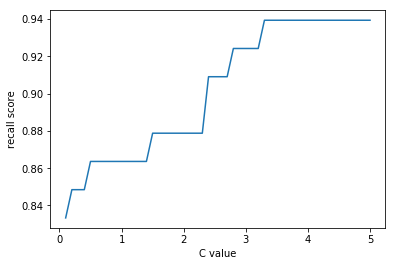

In [37]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Logisitic regression with class_weight='balanced'

1st max value of 0.924 occured at C=5.000


Text(0,0.5,'recall score')

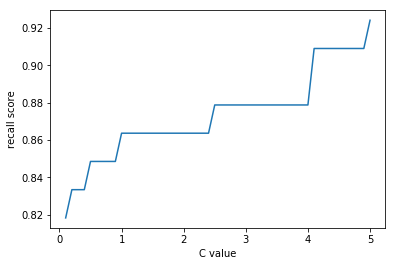

In [38]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [39]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.9550
[[45  0]
 [ 5 61]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        45
        1.0       1.00      0.92      0.96        66

avg / total       0.96      0.95      0.96       111

0.924242424242


## LogisticRegressionCV

Another solution to overfitting is through a process called cross validation. This is where we use multiple subsets of the training data during the training process.

In [40]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

Predict on Test data

In [41]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.9640
[[43  2]
 [ 2 64]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96        45
        1.0       0.97      0.97      0.97        66

avg / total       0.96      0.96      0.96       111



## Model validation

In this chapter we will use data from "the outside" in order to check if our models can really predict if a person has a CKD condition or that he/she does not have it.

In [42]:
# Reading data table and assigning names for columns
readDataGenerated = pd.read_table('chronic_kidney_disease_generated.arff', ',', header=None,
                         names=["specificGravity","albumin","pusCell","hemoglobin","packedCellVolume",
                                "redBloodCellCount","hypertension","diabetesMellitus",
                                "appetite","pedalEdema"])
dataGenerated = pd.DataFrame(readDataGenerated);
# Number of collumns and rows
print("Rows and Columns", dataGenerated.shape)
dataGenerated.head(20)

Rows and Columns (20, 10)


,specificGravity,albumin,pusCell,hemoglobin,packedCellVolume,redBloodCellCount,hypertension,diabetesMellitus,appetite,pedalEdema
0,1.015,1,1,0.845234,0.783493,0.70,1,0,1,0
1,1.025,3,0,0.464646,0.343434,0.50,0,1,1,1
2,1.005,2,1,0.344343,0.533535,0.40,0,1,1,0
3,1.010,1,1,0.545434,0.353535,0.30,0,1,0,0
4,1.010,4,0,0.534132,0.242424,0.50,0,1,1,0
5,1.020,6,1,0.431232,0.544554,0.50,0,0,0,1
6,1.025,5,1,0.542343,0.566556,0.75,0,0,1,0
7,1.015,3,0,0.433423,0.747447,0.35,1,0,1,0
8,1.020,2,1,0.545434,0.757557,0.45,1,0,0,1
9,1.010,1,1,0.434343,0.655656,0.55,1,1,1,1


## Testing Random Forest model on generated data

In [43]:
# Here we validate that the model trained gives the same results on the dataset tested(which returns correct class label)
print(rf_model.predict([[1.025,0,1,0.916667,1.000000,1.00,0,0,1,0]]))

# As you see bellow, our model can predict(using unknown data) the class based on previous training
print(rf_model.predict([[1.010,4,0,0.534132,0.242424,0.50,0,1,1,0]]))
print(rf_model.predict([[1.035,4,1,0.755757,0.767676,0.50,0,0,1,1]]))
print(rf_model.predict([[1.020,2,1,0.878787,0.656565,0.35,1,1,1,0]]))

[ 0.]
[ 1.]
[ 1.]
[ 1.]


| Train/Test Dataset % | Gaussian NB | Multinomial NB | Bernoulli NB | Random Forest | Logistic Regression | Logistic Regression CV |
|----------------------|-------------|----------------|--------------|---------------|---------------------|-----------|
|60-40|0.9527|0.9324|0.9527|0.9730|0.9189|0.9595|
|70-30|0.9550|0.9279|0.9550|0.9730|0.9189|0.9640|
|80-20|0.9730|0.9730|0.9730|0.9865|0.9459|0.9865|

As you can see above, the best train/test scenarious is when we allocate 80% of the dataset to training and 20% of it to testing.

## Conclusion

We have tried to predict if an individual has Chronic Kidney Disease based on data gathered form 5 different hospitals located in India. This dataset had 400 instances with different labels including a class which indicated if the individual had CDK. We have performed a lot of data cleaning activities including replacing missing values with values based on an algorithm chosen by us. We have also decided to remove less important columns from our datasat therefore in the end we based our predictions on 10 columns. We trained and tested our model and we have gotten very good prediction rates with best of them reaching 97%.

In conclusion we got the desired result and therefore totaly fulfilled our goal which was set before the start of this project. It could also be added that our work group was very happy about the results, since we have managed to achieve such high accuracies. We have also learned various techniques in both preparing the data and using it for training various models.